# *1. Load Libraries & Dataset*


In [1]:
# ------ Linear Regression ------

#Load modules
import numpy as np
import pandas as pd
import sklearn

#기계학습 모델 구축 및 평가 패키지
import scipy as sp
import scipy.stats as stats
import statsmodels.api as sm #통계모델
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler #feature 스케일링
from sklearn.model_selection import train_test_split  #데이터 분할
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error #MSE, MAE, R-squared 계산

#데이터 시각화 패키지
import seaborn as sns #pairplot, heatmap
import matplotlib.pyplot as plt #plot
import matplotlib.pylab as pylab #산점도, 추세선
import matplotlib.font_manager as fm
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #confusion matrix

#한글 폰트 설정
plt.rc('font', family='Malgun Gothic')


# ------ RandomForest Regression ------
#모듈 불러오기
from IPython.display import display, HTML
import warnings
warnings.filterwarnings(action='ignore')

#실습용 데이터 패키지
#from sklearn.datasets import load_breast_cancer, load_boston
from sklearn.preprocessing import MinMaxScaler

#데이터 전처리
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

#기계학습 모델 및 평가
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import plot_confusion_matrix
from tqdm import tqdm
from sklearn.model_selection import KFold

#시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
matplotlib.rcParams['axes.unicode_minus'] = False

#feature_importance
from sklearn.pipeline import Pipeline

#한글 폰트 설정
plt.rc('font', family='Malgun Gothic')


# ------ XGBoost Regression ------
from sklearn import preprocessing
import xgboost as xgb
from xgboost.sklearn import XGBRegressor #XGBR 모델
import datetime
from sklearn.model_selection import GridSearchCV

C:\Users\image2\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
## cultivar, period 제외하고 데이터 로드
df1 = pd.read_excel('./hybrid_apple_FV.xlsx', usecols = 'C:M') #copy path
df1

,mean_temp,feb,mar,apr,precp,latitude,elevation,northness_c,slope,bud_burst_j,full_blm_j
0,7.764368,3.104000,7.948387,12.116667,1.678161,35.759298,310,0.352511,6.098563,84,112
1,6.635632,-0.628000,6.970968,12.900000,0.942529,35.759298,310,0.352511,6.098563,89,112
2,6.647126,-0.912000,6.887097,13.333333,1.063218,36.278721,68,0.078008,2.875978,91,113
3,8.014943,3.160000,8.170968,12.543333,3.189655,36.865479,265,0.883680,4.642735,80,112
4,7.134483,-0.424000,7.235484,13.940000,2.189655,36.865479,265,0.883680,4.642735,92,112
...,...,...,...,...,...,...,...,...,...,...,...
334,4.940022,-0.567476,4.441574,11.137223,113.934019,37.171129,365,-0.996000,9.960000,85,108
335,4.424668,2.021999,4.849334,12.092154,187.817177,36.726097,33,-0.260000,1.790000,92,117
336,7.568440,-0.992342,6.021663,13.445125,169.202010,36.726097,33,-0.260000,1.790000,95,119
337,5.238840,0.185745,6.800788,10.797986,162.403721,36.726097,33,-0.260000,1.790000,85,117


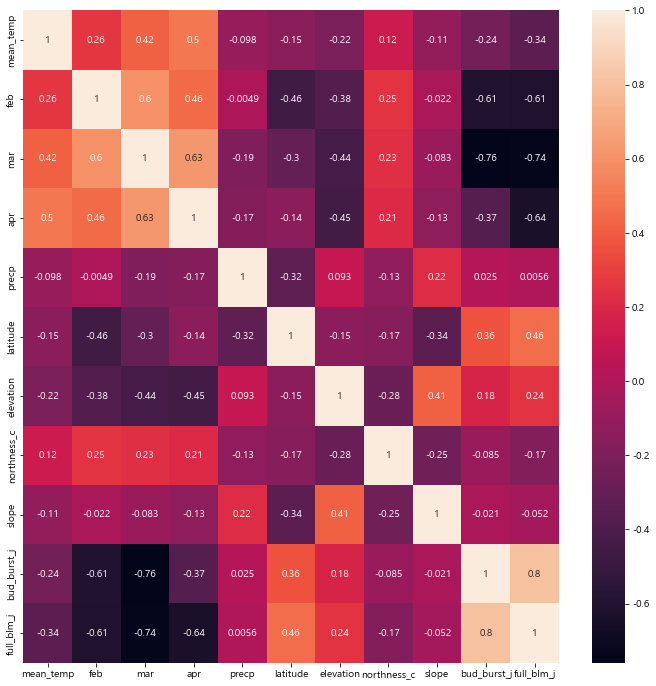

In [3]:
# 상관분석 : 자기상관을 하는 Feature를 제거하기 위해서...
# cultivar(0:후지, 1:홍로), period(년도), mean_temp(입춘(보통 2월3일)~4월 평균온도), feb(2월 평균온도)
# mar(3월 평균온도), apr(4월 평균온도), precp(입춘~4월 평균 강수량), latitude(위도), elevation(표고)
# northness_c(북향, 남향 변환값), slope(경사도), bud_burst_j(발아기 Day of year), full_blm_j(만개기 Day of year)

# 상관분석
df2 = df1.corr()

# 그림 사이즈 지정
fig, ax = plt.subplots(figsize=(12,12))

# 히트맵을 그린다
sns.heatmap(df2, annot=True,)  
plt.show()

In [4]:
#상관분석 결과 반영하여 불필요 컬럼 삭제
df1.drop(columns=['feb','apr'], inplace = True)

# *2. Model Test*



## *2.1 Linear Regression (LR)*

### *2.1.1 데이터 로딩*

In [5]:
df = df1
df

,mean_temp,mar,precp,latitude,elevation,northness_c,slope,bud_burst_j,full_blm_j
0,7.764368,7.948387,1.678161,35.759298,310,0.352511,6.098563,84,112
1,6.635632,6.970968,0.942529,35.759298,310,0.352511,6.098563,89,112
2,6.647126,6.887097,1.063218,36.278721,68,0.078008,2.875978,91,113
3,8.014943,8.170968,3.189655,36.865479,265,0.883680,4.642735,80,112
4,7.134483,7.235484,2.189655,36.865479,265,0.883680,4.642735,92,112
...,...,...,...,...,...,...,...,...,...
334,4.940022,4.441574,113.934019,37.171129,365,-0.996000,9.960000,85,108
335,4.424668,4.849334,187.817177,36.726097,33,-0.260000,1.790000,92,117
336,7.568440,6.021663,169.202010,36.726097,33,-0.260000,1.790000,95,119
337,5.238840,6.800788,162.403721,36.726097,33,-0.260000,1.790000,85,117


### *2.1.2 상관분석*

### *2.1.3 데이터 분할*

In [6]:
#데이터 정보 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mean_temp    339 non-null    float64
 1   mar          339 non-null    float64
 2   precp        339 non-null    float64
 3   latitude     339 non-null    float64
 4   elevation    339 non-null    int64  
 5   northness_c  339 non-null    float64
 6   slope        339 non-null    float64
 7   bud_burst_j  339 non-null    int64  
 8   full_blm_j   339 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 24.0 KB
None


In [7]:
#독립(X), 종속(y) 변수 지정
X1 = df.iloc[:, 0:8].values #values = columns에 있는 값들을 가져옴..
y1 = df.iloc[:, -1].values

#Numpy형태를 DataFrame형태로 변환
X = pd.DataFrame(X1)
y = pd.DataFrame(y1)

#컬럼명 변경
X.columns=['mean_temp', 'mar', 'precp', 'latitude', 'elevation', 'northness_c', 'slope', 'bud_burst_j']
y.columns=['full_blm_j']
print(X)
print(y)

     mean_temp       mar       precp   latitude  elevation  northness_c  \
0     7.764368  7.948387    1.678161  35.759298      310.0     0.352511   
1     6.635632  6.970968    0.942529  35.759298      310.0     0.352511   
2     6.647126  6.887097    1.063218  36.278721       68.0     0.078008   
3     8.014943  8.170968    3.189655  36.865479      265.0     0.883680   
4     7.134483  7.235484    2.189655  36.865479      265.0     0.883680   
..         ...       ...         ...        ...        ...          ...   
334   4.940022  4.441574  113.934019  37.171129      365.0    -0.996000   
335   4.424668  4.849334  187.817177  36.726097       33.0    -0.260000   
336   7.568440  6.021663  169.202010  36.726097       33.0    -0.260000   
337   5.238840  6.800788  162.403721  36.726097       33.0    -0.260000   
338   5.097200  8.691268  103.819138  36.726097       33.0    -0.260000   

        slope  bud_burst_j  
0    6.098563         84.0  
1    6.098563         89.0  
2    2.87597

In [8]:
#train, test 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 2022, 
                                                    shuffle = True
                                                    )

#데이터 형태 확인
print(X_train.shape)
print(X_test.shape )  
print(y_train.shape)  
print(y_test.shape)

(254, 8)
(85, 8)
(254, 1)
(85, 1)


### *2.1.4 모델에 적용*

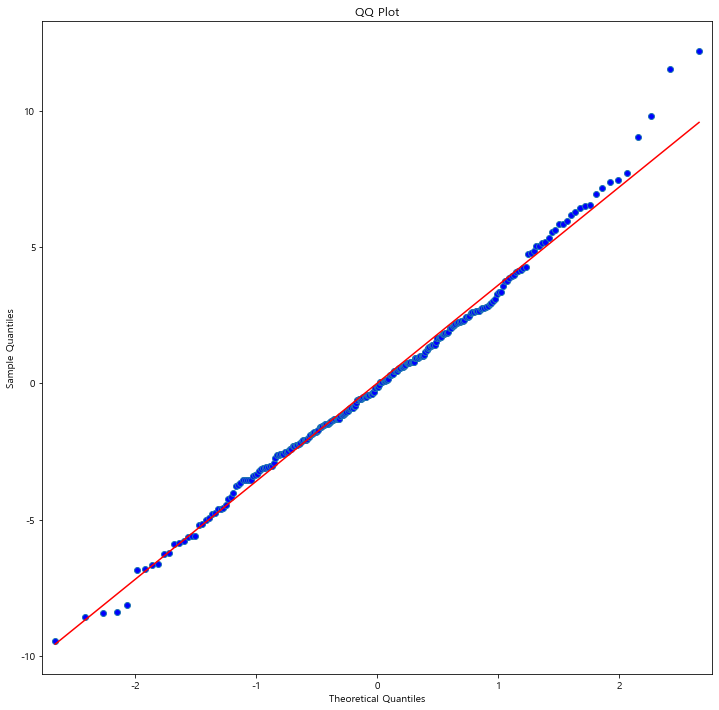

In [9]:
#다중선형회귀모델
X_train = sm.add_constant(X_train) #X_train 데이터에 콘스탄트 추가 ->  별도로독립변수에 상수항 추가
model = sm.OLS(y_train, X_train, axis=1) #다중선형회귀 모델의 독립변수, 종속변수 지정: train데이터
model_trained = model.fit() #모델에 적용

#확률오차의 정규성 확인: 다중선형회귀의 기본 가정(정규성, 등분산성, 독립성)에 대한 검정
model_residuals = model_trained.resid

#시각화
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(1,1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

[Text(0.5, 0, 'Fitted values'), Text(0, 0.5, 'Residuals')]

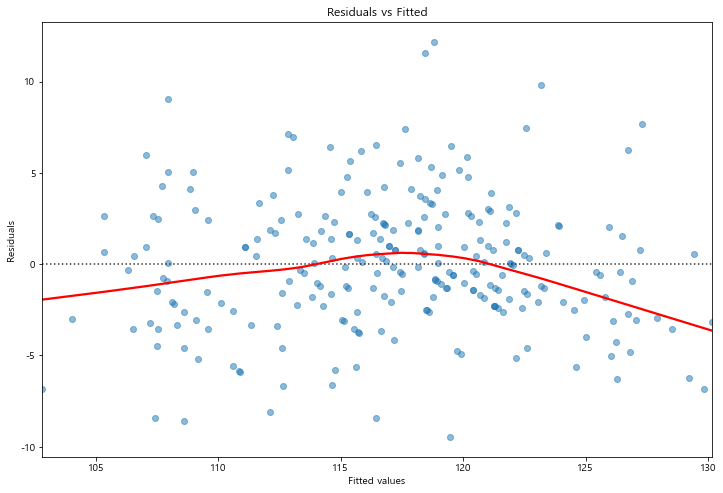

In [10]:
#확률오차의 등분산성 확인
model_fitted_y=model_trained.fittedvalues

fig, ax = plt.subplots(1,1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws={'alpha': 0.5},
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

In [11]:
#선형회귀모델 결과 요약
model_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             full_blm_j   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     76.14
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           4.30e-62
Time:                        15:28:34   Log-Likelihood:                -685.77
No. Observations:                 254   AIC:                             1390.
Df Residuals:                     245   BIC:                             1421.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          20.6955     13.961      1.482      0.140      -6.803      48.194
mean_temp      -0.3732      0.166     -2.250      0.025      -0.700      -0.047
mar            -0.8120      0.270     -3.003      0.003      -1.345      -0.279
precp          -0.0005      0.006     -0.081      0.935      -0.012       0.011
latitude        1.6227      0.334      4.854      0.000       0.964       2.281
elevation       0.0042      0.002      1.825      0.069      -0.000       0.009
northness_c    -0.0700      0.387     -0.181      0.857      -0.832       0.692
slope          -0.0210      0.068     -0.308      0.758      -0.155       0.113
bud_burst_j     0.4650      0.051      9.159      0.000       0.365       0.565
==============================================================================
Omnibus:                        5.516   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                5.544
Skew:                           0.261   Prob(JB):                       0.0625
Kurtosis:                       3.501   Cond. No.                     1.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
#P값이 높은 Feature를 제거하고자 할때
'''
model1 = sm.OLS(y_train, X_train.drop(['mean_temp', 'elevation', 'northness_c', 'slope'], axis=1))
model_trained1 = model1.fit()
print(model_trained1.summary())
'''

"\nmodel1 = sm.OLS(y_train, X_train.drop(['mean_temp', 'elevation', 'northness_c', 'slope'], axis=1))\nmodel_trained1 = model1.fit()\nprint(model_trained1.summary())\n"

### *2.1.5 시각화*

y=0.713150x+(33.614509)


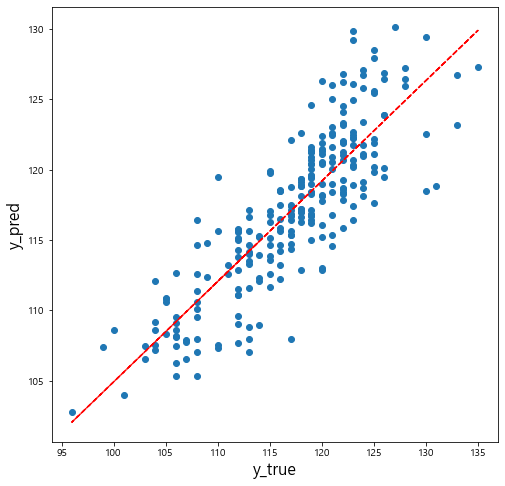

In [13]:
#y_train plot
y_train_pred = model_trained.fittedvalues

#DataFrame을 1d array로 변환
y_train = np.ravel(y_train)

# 추세선을 위한 계산 - 1차원의 polynomial(다항식)을 계산하기 위한 코드입니다.
z = np.polyfit(y_train, y_train_pred, 1) # (X,Y,차원) 정의
p = np.poly1d(z) # 1차원 다항식에 대한 연산을 캡슐화

# 그래프 그리기
pylab.figure(figsize=(8,8))
pylab.plot(y_train, y_train_pred,'o') #산점도를 뜻할 때 'o'라고 합니다.
pylab.plot(y_train, p(y_train),"r--")
pylab.xlabel('y_true', size=16)
pylab.ylabel('y_pred', size=16)

# 방정식 계산
print( "y=%.6fx+(%.6f)"%(z[0],z[1]))

y=0.706137x+(34.399126)


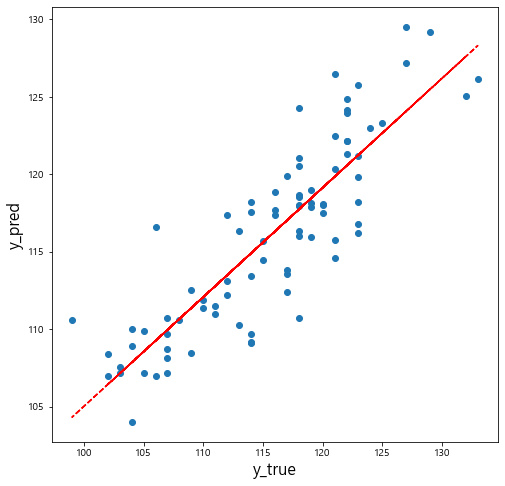

In [14]:
#Test데이터 적용
X_test = sm.add_constant(X_test)
y_test_pred = model_trained.predict(X_test)

#DataFrame을 1d array로 변환
y_test = np.ravel(y_test)

z = np.polyfit(y_test, y_test_pred, 1) # (X,Y,차원) 정의
p = np.poly1d(z) # 1차원 다항식에 대한 연산을 캡슐화

# 그래프 그리기
pylab.figure(figsize=(8,8))
pylab.plot(y_test, y_test_pred,'o') #산점도를 뜻할 때 'o'라고 합니다.
pylab.plot(y_test, p(y_test),"r--")
pylab.xlabel('y_true', size=16)
pylab.ylabel('y_pred', size=16)

# 방정식 계산
print( "y=%.6fx+(%.6f)"%(z[0],z[1]))

In [15]:
#평균 절대 백분율 오차
def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true-y_pred)/y_true))
print(mean_absolute_percentage_error(y_test, y_test_pred))

0.025267367256034897


In [16]:
#통계량 비교
print('------Train-----')
print('Training MSE: {:.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(y_train, y_train_pred)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred)))
print('Training R2: {:.3f}'.format(r2_score(y_train, y_train_pred)))
print('------Test------')
print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_test, y_test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, y_test_pred)))

------Train-----
Training MSE: 12.961
Training RMSE: 3.600
Training MAE: 2.798
Training MAPE: 0.024
Training R2: 0.713
------Test------
Testing MSE: 14.025
Testing RMSE: 3.745
Testing MAE: 2.880
Testing MAPE: 0.025
Testing R2: 0.737


### *2.1.6 결과 예측하기*

In [17]:
# Excel파일 제대로 열리는지 확인
df = pd.read_excel('./apple_test.xlsx') #copy path
df

#독립(X), 종속(y) 변수 지정
X1 = df.iloc[:, 1:9].values #values = columns에 있는 값들을 가져옴..
y1 = df.iloc[:, -1].values

#모델에 적용해서 예측해보기
apple_test = sm.add_constant(X1)
lin_reg = model_trained.predict(apple_test)
lin_reg1 = pd.DataFrame(lin_reg)
lin_reg1

,0
0,109.585141
1,113.125386
2,114.025362
3,109.048288
4,115.716822
5,112.848718
6,118.595092
7,117.561080
8,122.146108
9,109.665352


## *2.2 RandomForest Regression (RFR)*



### *2.2.1 데이터 로딩*

In [18]:
df = df1
df

,mean_temp,mar,precp,latitude,elevation,northness_c,slope,bud_burst_j,full_blm_j
0,7.764368,7.948387,1.678161,35.759298,310,0.352511,6.098563,84,112
1,6.635632,6.970968,0.942529,35.759298,310,0.352511,6.098563,89,112
2,6.647126,6.887097,1.063218,36.278721,68,0.078008,2.875978,91,113
3,8.014943,8.170968,3.189655,36.865479,265,0.883680,4.642735,80,112
4,7.134483,7.235484,2.189655,36.865479,265,0.883680,4.642735,92,112
...,...,...,...,...,...,...,...,...,...
334,4.940022,4.441574,113.934019,37.171129,365,-0.996000,9.960000,85,108
335,4.424668,4.849334,187.817177,36.726097,33,-0.260000,1.790000,92,117
336,7.568440,6.021663,169.202010,36.726097,33,-0.260000,1.790000,95,119
337,5.238840,6.800788,162.403721,36.726097,33,-0.260000,1.790000,85,117


### *2.2.2 데이터 분할 & 스케일링*

In [19]:
#X변수 11개(2022-05-16일자)
X1 = df.iloc[:, 0:8].values #values = columns에 있는 값들을 가져옴..
y1 = df.iloc[:, -1].values

#데이터프레임으로 변환
X = pd.DataFrame(X1)
y = pd.DataFrame(y1)

X.columns=[ 'mean_temp', 'mar', 'precp', 'latitude', 'elevation', 'northness_c', 'slope', 'bud_burst_j']
y.columns=['full_blm_j']

#데이터 split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 5,
                                                    )

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print(f'Train set dimension is {X_train.shape}')
print(f'Test set dimension is {X_test.shape}')

print(X.shape)
print(y.shape)

if X_train.shape[0] != y_train.shape[0]:
  print("X and y rows are mismatched, check dataset again")

Train set dimension is (254, 8)
Test set dimension is (85, 8)
(339, 8)
(339, 1)


### *2.2.3 RFR 통계모델 테스트*

In [20]:
#하이퍼파라미터 auto search
rfr = RandomForestRegressor(random_state=2021)
param_grid = {
    'max_depth':[10, 50, 100, 200], #값 변경 가능
    'max_leaf_nodes':[50,100,200],  #값 변경 가능
    'criterion':['mae','mse']
}

CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=10, verbose=1, n_jobs=-1, scoring='r2')
CV_rfr.fit(X_train, y_train)

# 최적의 하이퍼파라미터값을 적용한 RFR모델
best_rfr = CV_rfr.best_estimator_
best_rfr.fit(X_train, y_train) # 최적 RFR모델에 훈련데이터 적용

# 최적 RFR모델을 이용한 결과 예측
y_train_pred = best_rfr.predict(X_train)
y_pred = best_rfr.predict(X_test)

# 통계량 계산
r2score = r2_score(y_true=y_test, y_pred=y_pred) # R-squared score
mse = mean_squared_error(y_true=y_test, y_pred=y_pred) # MSE (Mean Squared Error)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred) # MAE (Mean Absolute Error)

# 테스트 데이터에 대한 RFR 모델의 통계량
print('Random Forest Regressor')
print(f"R2 score:{r2score:0.4f}", f"MSE:{mse:0.4f}", f"MAE:{mae:0.4f}", sep=' | ')

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Random Forest Regressor
R2 score:0.6469 | MSE:16.3243 | MAE:2.8976


### *2.2.4 시각화*

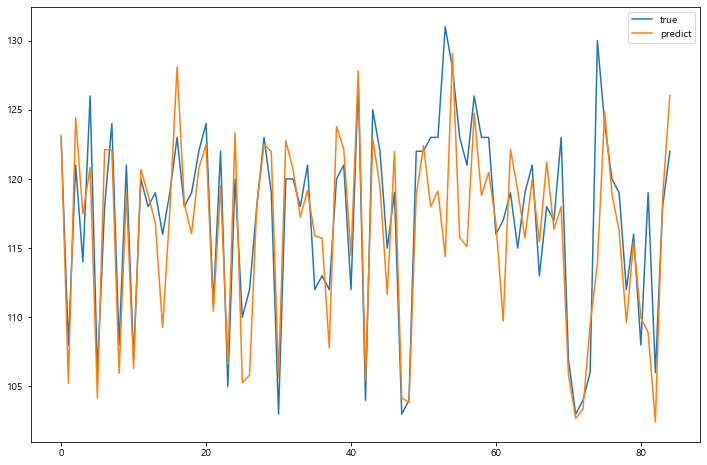

In [21]:
#모델 성능 측정
answer = pd.DataFrame(y_test.reset_index())
del answer["index"]

pylab.figure(figsize=(12,8))
plt.plot(answer, label="true")
plt.plot(best_rfr.predict(X_test), label="predict")
plt.legend()

y=0.922869x+(9.013825)
The training r2 is: 0.9726


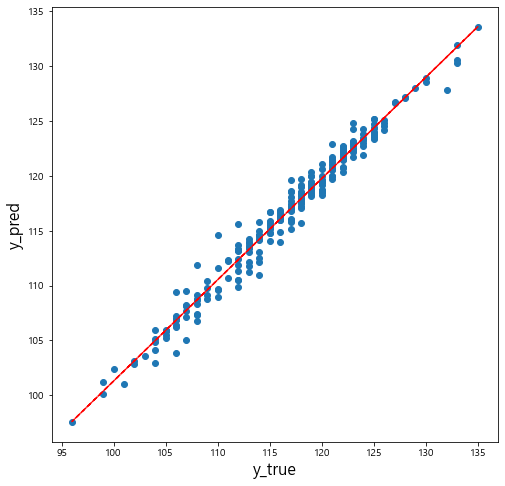

In [22]:
# y_train plot

#R-squared 계산
r2score_train = r2_score(y_train, y_train_pred) # R-squared score
r2score_train

#DataFrame을 1d array로 변환
y_train_np = np.ravel(y_train)

# 추세선을 위한 계산 - 1차원의 polynomial(다항식)을 계산하기 위한 코드
z = np.polyfit(y_train_np, y_train_pred, 1) # (X,Y,차원) 정의
p = np.poly1d(z) # 1차원 다항식에 대한 연산을 캡슐화

# 그래프 그리기
pylab.figure(figsize=(8,8))
pylab.plot(y_train_np, y_train_pred,'o') #산점도를 뜻할 때 'o'
pylab.plot(y_train_np, p(y_train_np),"r--")
pylab.xlabel('y_true', size=16)
pylab.ylabel('y_pred', size=16)

# 방정식 계산
print( "y=%.6fx+(%.6f)"%(z[0],z[1]))
print('The training r2 is: %.4f'% r2score_train)

y=0.836680x+(18.099449)
The testing r2 is: 0.6469


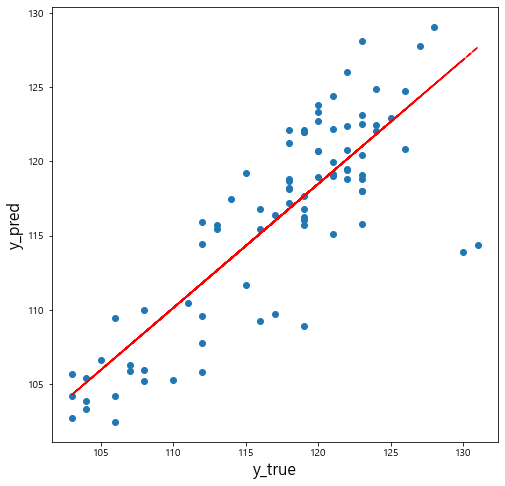

In [23]:
# y_test plot 준비

#DataFrame을 1d array로 변환
y_true = np.ravel(y_test)

# 추세선을 위한 계산 - 1차원의 polynomial(다항식)을 계산하기 위한 코드입니다.
z = np.polyfit(y_true, y_pred, 1) # (X,Y,차원) 정의
p = np.poly1d(z) # 1차원 다항식에 대한 연산을 캡슐화

# 그래프 그리기
pylab.figure(figsize=(8,8))
pylab.plot(y_true, y_pred,'o') #산점도를 뜻할 때 'o'라고 합니다.
pylab.plot(y_true, p(y_true),"r--")
pylab.xlabel('y_true', size=16)
pylab.ylabel('y_pred', size=16)

# 방정식 계산
print( "y=%.6fx+(%.6f)"%(z[0],z[1]))
print('The testing r2 is: %.4f'% r2score)

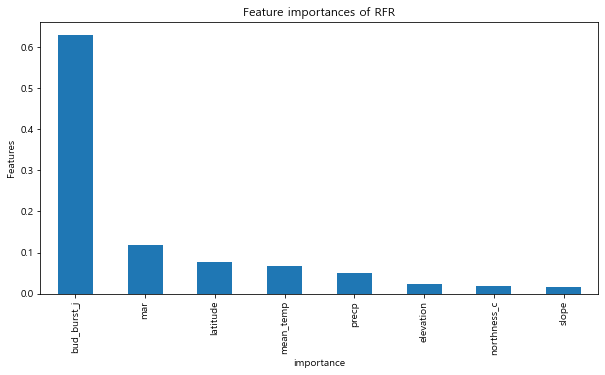

In [24]:
# Random Forest Feature Ranking

#Feature importance 시각화
f_list = list(X.columns)
f_importance = pd.Series(best_rfr.feature_importances_, index=f_list).sort_values(ascending=False)
f_importance

plt.subplots(figsize=(10,5) )
f_importance.plot(kind='bar')
plt.title("Feature importances of RFR")
plt.xlabel("importance")
plt.ylabel("Features")
plt.show()

In [25]:
# Excel파일 제대로 열리는지 확인
df = pd.read_excel('./apple_test.xlsx') #copy path
df

#X변수 11개(2022-05-16일자)
X1 = df.iloc[:, 1:9].values #values = columns에 있는 값들을 가져옴..

#데이터프레임으로 변환
apple_test1 = pd.DataFrame(X1)
apple_test1.columns=['mean_temp', 'mar', 'precp', 'latitude', 'elevation', 'northness_c', 'slope', 'bud_burst_j']

#Data scaling
scaler = MinMaxScaler()
apple_test1 = scaler.fit_transform(apple_test1)

#모델을 이용해서 예측
RFR_pred = best_rfr.predict(apple_test1)
RFR_pred1 = pd.DataFrame(RFR_pred)
RFR_pred1

,0
0,107.17
1,111.61
2,113.20
3,104.69
4,113.09
5,109.89
6,117.30
7,114.06
8,121.75
9,107.27


## *2.3 XGboost Regression (XGBR)*

### *2.3.1 데이터 로딩*

In [26]:
# X변수 최종(2022-05-19일자)
df = df1
print(df.head(20))

X1 = df.iloc[:, 0:8].values #values = columns에 있는 값들을 가져옴..
y1 = df.iloc[:, -1].values

# 데이터프레임으로 변환
X = pd.DataFrame(X1)
y = pd.DataFrame(y1)

X.columns=['mean_temp', 'mar', 'precp', 'latitude', 'elevation', 'northness_c', 'slope', 'bud_burst_j']
y.columns=['full_blm_j']

print(X)
print(y)

    mean_temp       mar       precp   latitude  elevation  northness_c  \
0    7.764368  7.948387    1.678161  35.759298        310     0.352511   
1    6.635632  6.970968    0.942529  35.759298        310     0.352511   
2    6.647126  6.887097    1.063218  36.278721         68     0.078008   
3    8.014943  8.170968    3.189655  36.865479        265     0.883680   
4    7.134483  7.235484    2.189655  36.865479        265     0.883680   
5    6.248276  6.364516    1.879310  36.301705        308     0.945501   
6    5.178161  5.506452    1.011494  36.301705        308     0.945501   
7    6.031034  6.287097    1.614943  36.968666        217     0.681628   
8    4.911494  5.109677    1.465517  38.096021        149     0.291631   
9    7.494253  6.509677    2.034483  37.175318          3     0.143063   
10   6.040230  7.345161    1.212644  37.175318          3     0.143063   
11   5.959227  6.358065  274.685261  38.075077         17    -0.621000   
12   5.754960  5.241257  232.834963  3

### *2.3.2 데이터 분할 & 스케일링* 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 2022, 
                                                    shuffle = True
                                                    )

#scaling을 하니 R2값이 낮아짐
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)

scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test) #StandardSclaer를 X_train에 적용

print(f'Train set dimension is {X_train.shape}')
print(f'Test set dimension is {X_test.shape}')

print(X.shape)
print(y.shape)

if X_train.shape[0] != y_train.shape[0]:
  print("X and y rows are mismatched, check dataset again")

Train set dimension is (254, 8)
Test set dimension is (85, 8)
(339, 8)
(339, 1)


### *2.3.3 XGBR모델에 적용*

In [28]:
# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
print(xgb_grid.best_estimator_)

best_XGboost = xgb_grid.best_estimator_
best_XGboost.fit(X_train, y_train)

y_train_pred = best_XGboost.predict(X_train)
y_pred = best_XGboost.predict(X_test)

r2score = r2_score(y_true=y_test, y_pred=y_pred) # R-squared score
mse = mean_squared_error(y_true=y_test, y_pred=y_pred) # MSE (Mean Squared Error)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred) # MAE (Mean Absolute Error)

print('XGBRegressor')
print(f"R2 score:{r2score:0.4f}", f"MSE:{mse:0.4f}", f"MAE:{mae:0.4f}", sep=' | ')

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[15:28:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:28:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


0.743717494210143
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
          

### *2.3.4 시각화*

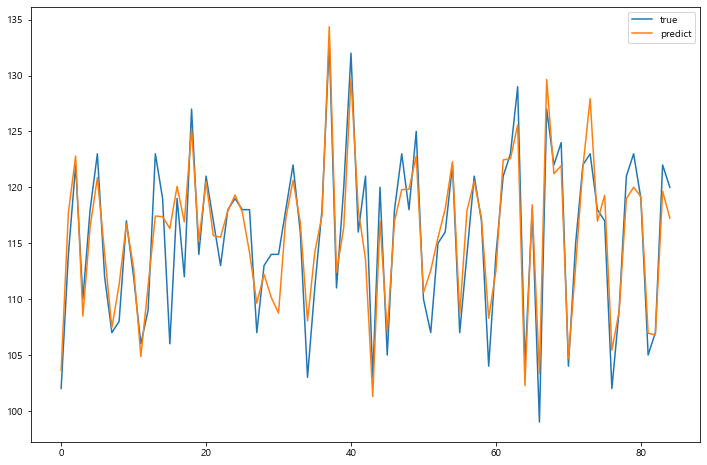

In [29]:
#모델 성능 측정
answer = pd.DataFrame(y_test.reset_index())
del answer["index"]

pylab.figure(figsize=(12,8))
plt.plot(answer, label="true")
plt.plot(best_XGboost.predict(X_test), label="predict")
plt.legend()

y=0.996350x+(0.428734)
The training r2 is: 0.99940


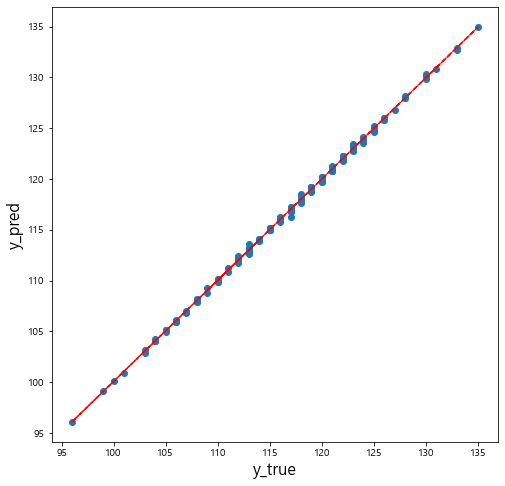

In [30]:
# Y_train plot

#R-squared 계산
r2score_train = r2_score(y_train, y_train_pred) # R-squared score
r2score_train

#DataFrame을 1d array로 변환
y_train_np = np.ravel(y_train)

# 추세선을 위한 계산 - 1차원의 polynomial(다항식)을 계산하기 위한 코드입니다.
z = np.polyfit(y_train_np, y_train_pred, 1) # (X,Y,차원) 정의
p = np.poly1d(z) # 1차원 다항식에 대한 연산을 캡슐화

# 그래프 그리기
pylab.figure(figsize=(8,8))
pylab.plot(y_train_np, y_train_pred,'o') #산점도를 뜻할 때 'o'라고 합니다.
pylab.plot(y_train_np, p(y_train_np),"r--")
pylab.xlabel('y_true', size=16)
pylab.ylabel('y_pred', size=16)

# 방정식 계산
print( "y=%.6fx+(%.6f)"%(z[0],z[1]))
print('The training r2 is: %.5f'% r2score_train)

y=0.822493x+(20.689529)
The testing r2 is: 0.8569


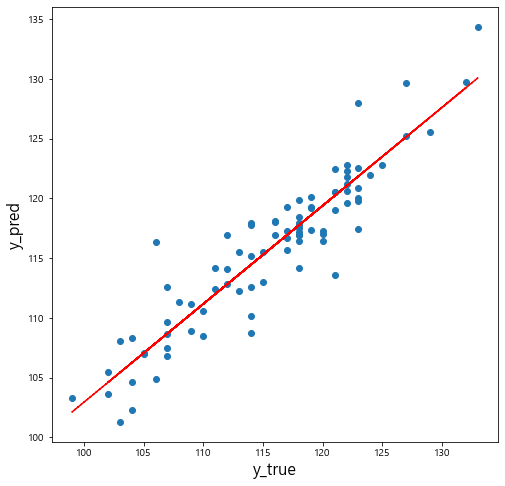

In [31]:
# Y_test plot 준비

#R-squared 계산
r2score_test = r2_score(y_test, y_pred) # R-squared score
r2score_test

#DataFrame을 1d array로 변환
y_true = np.ravel(y_test)

# 추세선을 위한 계산 - 1차원의 polynomial(다항식)을 계산하기 위한 코드입니다.
z = np.polyfit(y_true, y_pred, 1) # (X,Y,차원) 정의
p = np.poly1d(z) # 1차원 다항식에 대한 연산을 캡슐화

# 그래프 그리기
pylab.figure(figsize=(8,8))
pylab.plot(y_true, y_pred,'o') #산점도를 뜻할 때 'o'라고 합니다.
pylab.plot(y_true, p(y_true),"r--")
pylab.xlabel('y_true', size=16)
pylab.ylabel('y_pred', size=16)

# 방정식 계산
print( "y=%.6fx+(%.6f)"%(z[0],z[1]))
print('The testing r2 is: %.4f'% r2score_test)

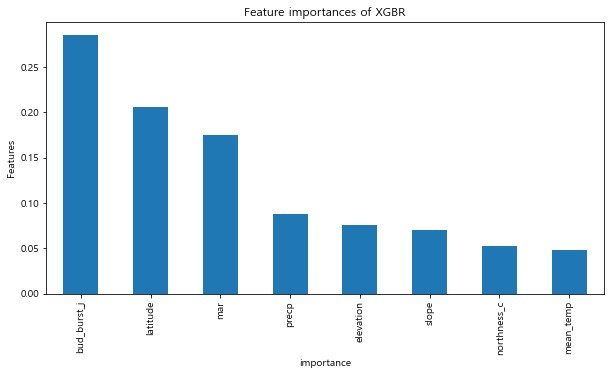

In [32]:
# XGboost Feature Ranking

#Feature importance 시각화
f_list = list(X.columns)
f_importance = pd.Series(best_XGboost.feature_importances_, index=f_list).sort_values(ascending=False)
f_importance

plt.subplots(figsize=(10,5) )
f_importance.plot(kind='bar')
plt.title("Feature importances of XGBR")
plt.xlabel("importance")
plt.ylabel("Features")
plt.show()

In [33]:
# Excel파일 제대로 열리는지 확인
df = pd.read_excel('./apple_test.xlsx') #copy path
df
#print(df)

#X변수 11개(2022-05-16일자)
X1 = df.iloc[:, 1:9].values #values = columns에 있는 값들을 가져옴..
#print(X1)

#데이터프레임으로 변환
X = pd.DataFrame(X1)
X.columns=['mean_temp', 'mar', 'precp', 'latitude', 'elevation', 'northness_c', 'slope', 'bud_burst_j']

#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

scaler = StandardScaler()
scaler.fit(X)

#예측
XGB_pred = best_XGboost.predict(X)
XGB_pred1 = pd.DataFrame(XGB_pred)
XGB_pred1

,0
0,112.029221
1,116.903084
2,112.969299
3,111.748444
4,112.163094
5,118.000420
6,116.356331
7,115.165756
8,116.948288
9,110.135963
